In [1]:
from turtle import distance
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.spatial.distance import directed_hausdorff
%matplotlib inline


# Check curve lidar

In [ ]:
def world_coordinates_to_image(self,world_point):    
    return (world_point*self.scale + np.array([self.translate_x, self.translate_y])).astype(int)   
    

In [3]:
cd = pd.read_csv("../data/overall__imu__data.csv")


In [78]:
positions = np.stack([cd['positions_x_ground_truth'], -cd['positions_y_ground_truth']], axis=1)
orientations = (cd['orientation_measurement']- np.pi/2)%(2*np.pi)

new_os = []
x_axis = np.array([1,0], dtype=float)
for o in orientations: 
    # convert to vector length 1 and invert y axis
    vec = np.array([np.cos(o), -np.sin(o)], dtype=float)
    angle = np.arctan2(vec[1], vec[0])% (np.pi*2)
    print(np.rad2deg(angle))
    new_os.append(angle)
new_os = np.array(new_os)

359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.84080627653634
359.8409838614548
359.83549921955125
359.8048589909346
359.7850651027199
359.76087940286885
359.706046644212
359.6779677365341
359.6164072415447
359.58504301287604
359.5500382933797
359.47823934482454
359.4395053420414
359.3660329971396
359.3264725414669
359.2521259323513
359.21139068414135
359.17068958687724
359.0927229775015
359.0488663328409
358.9670270062058
358.9220160595754
358.87546832038174
358.7886088047067
358.7433109901312
358.69713208115274
358.5994945269674
358.5518539575066
358.450104629

old:  0.0027784546229503437 new:  359.84080627653634


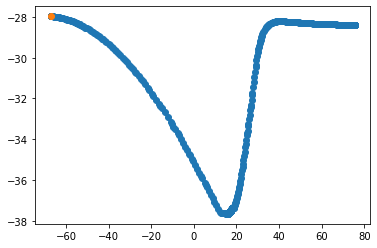

In [79]:
    

plt.scatter(positions[:,0], positions[:,1])
plt.scatter(positions[0,0], positions[0,1])

print("old: ", orientations[0], "new: ", np.rad2deg(new_os[0]))

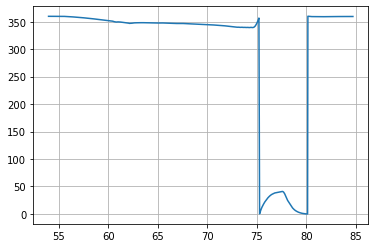

In [80]:
#plt.plot(cd['timestamps'], np.rad2deg(cd['orientation_measurement']))
plt.plot(cd['timestamps'], np.rad2deg(new_os))
plt.grid()

## Speichern der Distanzen 
Die Distanzen werden gespeichert und gemittelt (Median oder Mean). Anschließen wird dasselbe für die Messung getan. Aus dem Partikelresulatet wird eine Normalbverteilung erstellt, die MEssung wird in die PDF gegeben --> Gewicht